In [18]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.utils import shuffle
from sklearn.datasets import load_wine

import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_score
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from collections import Counter
from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, 
                                     cross_val_score, GridSearchCV, 
                                     learning_curve, validation_curve)

from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_wine
from scipy.stats import boxcox
from collections import Counter
from sklearn.cluster import KMeans

GLASS_ORIGIN = '/Users/Piotr/Workspace/DataScience/glass.data'

def load_glass():
    glass = pd.read_csv(GLASS_ORIGIN)
    return {'data': glass[glass.columns.values[1:-1]].as_matrix(),
            'target': glass[glass.columns.values[-1]].as_matrix()}

def accuracy(y_true, y_pred, average):
    return accuracy_score(y_true, y_pred)


def calculate_mean_and_deviation_from_scores(metrics, scores):
    return {metric: (np.mean(scores[metric]), np.var(scores[metric])) for metric in metrics}


def get_metrics_dict(metrics):
    return {metric: [] for metric in metrics}


def model_selection(data, target, model, metrics, splits):
    x, y = shuffle(data, target)
    scores = get_metrics_dict(metrics)
    for train_index, test_index in KFold(n_splits=splits).split(x):
        x_test, x_train, y_test, y_train = split_data_set(x, y, train_index, test_index)
        y_prediction = model.fit(x_train, y_train).predict(x_test)

        for metric in metrics:
            scores[metric].append(metric(y_test, y_prediction, average='macro'))
        
    print(scores[f1_score])
    print("dddddddddddddddd")
    print(calculate_mean_and_deviation_from_scores(metrics, scores))
    return calculate_mean_and_deviation_from_scores(metrics, scores)


def binning_data_set():
    pass


def split_data_set(x, y, train_index, test_index):
    return x[test_index], x[train_index], y[test_index], y[train_index]

def make_value(value):
    return "{0:.4f} +/- {1:.4f}".format(value[0], value[1])

%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 9)

In [10]:
metrics = [accuracy, f1_score, precision_score, recall_score]
# wine = load_wine()
glass = load_glass()
# diabets = load_diabets()
model = GaussianNB()
model2 = MultinomialNB()

data_set = glass
k = 20

In [67]:
padata = data_set['data']
data_cut = np.zeros(padata.shape)
k = 30
for i in range(padata.shape[1]):
    data_cut[:, i] = pd.cut(padata[:, i], k, labels=np.arange(1, k+1))

In [118]:
data_qcut = np.zeros(padata.shape)
k = 10
for i in range(padata.shape[1]):
    data_qcut[:, i] = pd.qcut(padata[:, i], k, labels=False, duplicates='drop') + 1

print(data_qcut)

[[9. 7. 9. ... 6. 1. 1.]
 [5. 8. 7. ... 1. 1. 1.]
 [2. 7. 6. ... 1. 1. 1.]
 ...
 [9. 9. 1. ... 4. 2. 1.]
 [3. 9. 1. ... 4. 2. 1.]
 [4. 9. 1. ... 6. 2. 1.]]


In [160]:
data_means = np.zeros(padata.shape)
k = 30
for i in range(padata.shape[1]):
    kmeans = KMeans(n_clusters=k).fit(padata[:, i].reshape(-1,1))
    data_means[:, i] = kmeans.labels_ + 1

print(data_means)

[[ 8. 20. 10. ... 22.  1.  1.]
 [28. 15. 30. ...  7.  1.  1.]
 [27. 17.  3. ...  7.  1.  1.]
 ...
 [20. 24.  2. ...  1. 21.  1.]
 [ 1. 24.  2. ... 25.  5.  1.]
 [30.  2.  2. ... 14. 11.  1.]]


[0.4868326220573826, 0.41443377822688166]
dddddddddddddddd
{<function accuracy at 0x113472268>: (0.397196261682243, 0.0026421521530264657), <function f1_score at 0x111ad2620>: (0.45063320014213215, 0.0013103981469983158), <function precision_score at 0x111ad2840>: (0.4721653346653347, 0.0037799839392517534), <function recall_score at 0x111ad28c8>: (0.5099392681049029, 0.00023936672402569056)}
[0.535009501410299, 0.28061129691564474, 0.40438581214443287]
dddddddddddddddd
{<function accuracy at 0x113472268>: (0.3965179968701095, 0.011063063741517089), <function f1_score at 0x111ad2620>: (0.4066688701567922, 0.010789013918627889), <function precision_score at 0x111ad2840>: (0.4334750840185622, 0.010970463083264928), <function recall_score at 0x111ad28c8>: (0.46626850515739404, 0.005584695535355871)}
[0.5754975716216026, 0.4779058075227705, 0.4138475903181786, 0.3466235857540205]
dddddddddddddddd
{<function accuracy at 0x113472268>: (0.42933263452131376, 0.013391905537316125), <function f1

/Users/Piotr/Workspace/Envs/data-science/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Piotr/Workspace/Envs/data-science/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Piotr/Workspace/Envs/data-science/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/Piotr/Workspace/Envs/data-science/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', 

[0.5250544662309368, 0.24696969696969698, 0.165, 0.3314285714285714, 0.7142857142857143, 0.27189542483660134, 0.47875816993464054, 0.3869047619047619, 0.5047619047619047, 0.5, 0.5222222222222223, 0.6243223443223442, 0.25]
dddddddddddddddd
{<function accuracy at 0x113472268>: (0.4920814479638009, 0.021732029698409126), <function f1_score at 0x111ad2620>: (0.4247387136074919, 0.024717104004187397), <function precision_score at 0x111ad2840>: (0.4689410945180176, 0.022805645409707403), <function recall_score at 0x111ad28c8>: (0.4688400488400487, 0.03396890181450622)}
[0.4013986013986014, 0.3, 0.5206349206349207, 0.4742857142857143, 0.5923076923076923, 0.34, 0.18333333333333335, 0.4342105263157895, 0.2776470588235294, 0.255050505050505, 0.858974358974359, 0.4698412698412698, 0.4166666666666667, 0.4718614718614719]
dddddddddddddddd
{<function accuracy at 0x113472268>: (0.46755952380952387, 0.024397764314058958), <function f1_score at 0x111ad2620>: (0.42830086567813247, 0.02603676621407178), 

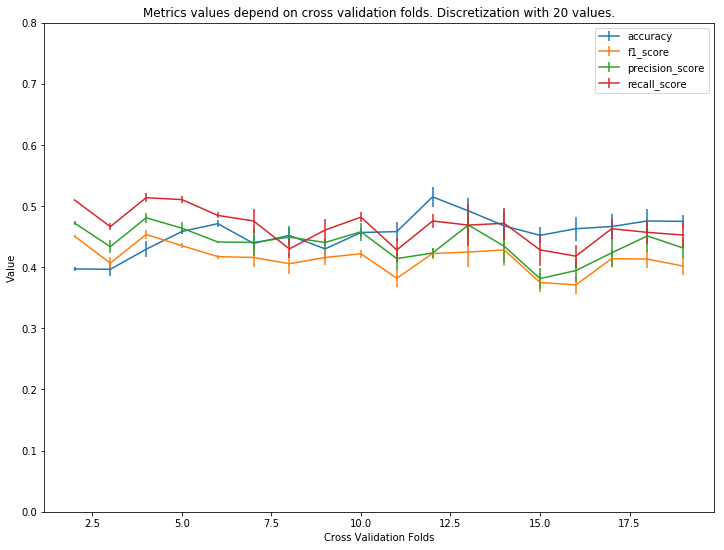

In [19]:

scores = []
folds = np.arange(2, 20)
for i in folds:
    scores.append(model_selection(data_set['data'], data_set['target'], model, metrics, i))

for metric in metrics:
    means = [score[metric][0] for score in scores]
    deviations = [score[metric][1] for score in scores]
    plt.errorbar(folds, means, deviations, label=metric.__name__)

    
plt.ylim((0.0, 0.8))
plt.title("Metrics values depend on cross validation folds. Discretization with {} values.".format(k))
plt.xlabel("Cross Validation Folds")
plt.ylabel("Value")
plt.legend()
plt.show()

In [165]:
tables = pd.DataFrame(columns=['{}-F'.format(k) for k in folds], index=['accuracy','f1_score','precission', 'recall'])

for k in folds:
    tables['{}-F'.format(k)] = pd.Series({'accuracy': make_value(scores[k-2][metrics[0]]),
                                          'f1_score': make_value(scores[k-2][metrics[1]]),
                                          'precission': make_value(scores[k-2][metrics[2]]),
                                          'recall': make_value(scores[k-2][metrics[3]])})

In [166]:
tables

,2-F,3-F,4-F,5-F,6-F,7-F,8-F,9-F,10-F,11-F,12-F,13-F,14-F,15-F,16-F,17-F,18-F,19-F
accuracy,0.3785 +/- 0.0000,0.3692 +/- 0.0040,0.3973 +/- 0.0083,0.3832 +/- 0.0021,0.4058 +/- 0.0093,0.4009 +/- 0.0077,0.4071 +/- 0.0061,0.4012 +/- 0.0050,0.3983 +/- 0.0116,0.4112 +/- 0.0104,0.4014 +/- 0.0145,0.3979 +/- 0.0101,0.4074 +/- 0.0062,0.4298 +/- 0.0220,0.4179 +/- 0.0142,0.3978 +/- 0.0155,0.4074 +/- 0.0156,0.4071 +/- 0.0216
f1_score,0.3256 +/- 0.0000,0.3351 +/- 0.0017,0.3912 +/- 0.0067,0.3488 +/- 0.0022,0.3778 +/- 0.0129,0.3605 +/- 0.0124,0.3295 +/- 0.0067,0.3668 +/- 0.0146,0.3575 +/- 0.0204,0.3386 +/- 0.0070,0.3494 +/- 0.0141,0.3425 +/- 0.0125,0.3431 +/- 0.0112,0.3544 +/- 0.0246,0.3315 +/- 0.0129,0.3047 +/- 0.0236,0.3013 +/- 0.0129,0.2971 +/- 0.0149
precission,0.3346 +/- 0.0002,0.3258 +/- 0.0024,0.3922 +/- 0.0031,0.3552 +/- 0.0041,0.3822 +/- 0.0114,0.3823 +/- 0.0122,0.3345 +/- 0.0056,0.3936 +/- 0.0105,0.3883 +/- 0.0154,0.3579 +/- 0.0165,0.3862 +/- 0.0148,0.3843 +/- 0.0147,0.3715 +/- 0.0111,0.3931 +/- 0.0263,0.3716 +/- 0.0123,0.3295 +/- 0.0253,0.3315 +/- 0.0166,0.3255 +/- 0.0188
recall,0.3895 +/- 0.0005,0.4338 +/- 0.0009,0.5154 +/- 0.0132,0.4322 +/- 0.0022,0.4291 +/- 0.0168,0.4103 +/- 0.0176,0.3818 +/- 0.0139,0.4051 +/- 0.0243,0.3888 +/- 0.0247,0.4048 +/- 0.0079,0.3900 +/- 0.0181,0.3692 +/- 0.0162,0.4076 +/- 0.0173,0.3798 +/- 0.0293,0.3563 +/- 0.0185,0.3111 +/- 0.0287,0.3312 +/- 0.0194,0.3090 +/- 0.0164


(214, 9)

array([[1., 1., 3., ..., 1., 0., 0.],
       [1., 1., 3., ..., 0., 0., 0.],
       [0., 1., 3., ..., 0., 0., 0.],
       ...,
       [1., 2., 0., ..., 1., 2., 0.],
       [0., 2., 0., ..., 1., 1., 0.],
       [1., 2., 0., ..., 1., 2., 0.]])